<a href="https://colab.research.google.com/github/NurayVakitbilir/Project/blob/master/Hilal_Vakitbilir_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Prediction on the same day

`The purpose of this section is to forecast the radiation of the same day as the climate variables are available.`

## Importing the data and the target

In [0]:
data_url='https://raw.githubusercontent.com/NurayVakitbilir/Project/master/Kalkanli%20data__v8.csv'
features =pd.read_csv(data_url)

In [3]:
features.head()

,Year,Month,Day,Rainfall,RH,Pressure,Temp,Min_T,Max_T,W_Speed,W_Direction
0,1992,1,1,0,65.82,99.31,8.16,7.22,9.70,8.33,337.27
1,1992,1,2,0,64.95,100.31,6.48,5.15,8.12,7.91,2.92
2,1992,1,3,0,64.31,100.77,7.96,5.19,10.23,4.85,20.17
3,1992,1,4,0,66.16,101.59,10.76,8.81,12.74,2.43,75.81
4,1992,1,5,0,79.61,101.40,12.10,9.92,14.64,4.84,259.60


In [0]:
target1_url='https://raw.githubusercontent.com/NurayVakitbilir/Project/master/Kalkanli%20data__v8_target1.csv'
target1 =pd.read_csv(target1_url) #allsky

In [0]:
target2_url='https://raw.githubusercontent.com/NurayVakitbilir/Project/master/Kalkanli%20data__v8_target2.csv'
target2 =pd.read_csv(target2_url) #clearsky

In [0]:
target3_url='https://raw.githubusercontent.com/NurayVakitbilir/Project/master/Kalkanli%20data__v8_target3.csv'
target3 =pd.read_csv(target3_url) #radiation

In [0]:
feature = np.array(features)

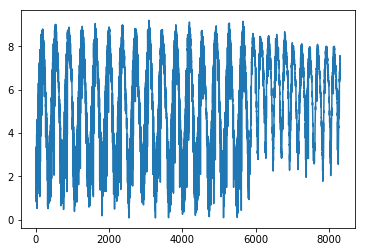

In [8]:
plt.plot(range(len(target1)), target1) # allsky conditions radiation
plt.show()

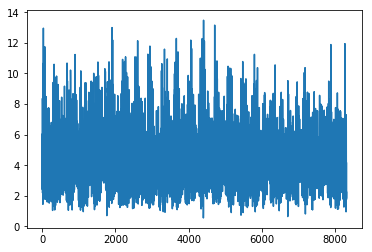

In [9]:
wind = feature[:, 9]  # wind speed
plt.plot(range(len(wind)), wind)
plt.show()

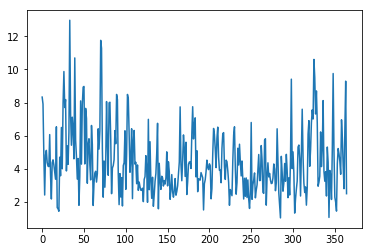

In [10]:
plt.plot(range(365), wind[:365]) #wind speed range for a year
plt.show()

## Scaling and splitting

In [0]:
mean = features[:5530].mean(axis=0)
features -= mean
std = features[:5530].std(axis=0)
features /= std

In [12]:
features.mean(), features.std()

(Year           1.021982
 Month          0.035930
 Day            0.001228
 Rainfall      -0.079739
 RH            -0.124461
 Pressure      -0.058287
 Temp           0.138028
 Min_T          0.140317
 Max_T          0.135995
 W_Speed       -0.053035
 W_Direction    0.043591
 dtype: float64, Year           1.723905
 Month          0.949413
 Day            1.003022
 Rainfall       0.849042
 RH             0.964067
 Pressure       1.006644
 Temp           1.002499
 Min_T          1.012558
 Max_T          0.993076
 W_Speed        0.947521
 W_Direction    0.999242
 dtype: float64)

In [0]:
from numpy import split, array
 
# splitting the dataset into train/test sets
def split_dataset(data):
	train, test = data[:5530], data[5531:-5]
	return train, test
 
X_train, X_test = split_dataset(features.values)
y1_train, y1_test =  split_dataset(target1.values)
y2_train, y2_test =  split_dataset(target2.values)
y3_train, y3_test =  split_dataset(target3.values)

In [14]:
X_train[1]

array([-1.61907185e+00, -1.57869770e+00, -1.55854250e+00, -3.08017459e-01,
        9.64828916e-04,  1.30031122e+00, -2.13137283e+00, -2.11364237e+00,
       -2.11819268e+00,  1.86627349e+00, -2.04446431e+00])

In [15]:
y1_train[1]

array([3.02])

## Predictions


In [0]:
from sklearn.metrics import mean_squared_error as mse

### Linear regression

In [0]:
from sklearn.linear_model import LinearRegression

In [18]:
linreg1 = LinearRegression().fit(X_train, y1_train)
print('mse for train:', mse (y1_train, linreg1.predict(X_train)))
print('mse for test:', mse(y1_test, linreg1.predict(X_test)))
print('train score:', linreg1.score(X_train, y1_train))
print('test score:', linreg1.score(X_test, y1_test))

mse for train: 1.0631458483270075
mse for test: 0.8591616416241774
train score: 0.8009455147433625
test score: 0.7219007103200986


In [19]:
linreg2 = LinearRegression().fit(X_train, y2_train)
print('mse for train:', mse (y2_train, linreg2.predict(X_train)))
print('mse for test:', mse(y2_test, linreg2.predict(X_test)))
print('train score:', linreg2.score(X_train, y2_train))
print('test score:', linreg2.score(X_test, y2_test))

mse for train: 0.9611193274644038
mse for test: 0.6689465877967131
train score: 0.7433760446972053
test score: 0.7732834537717767


In [20]:
linreg3 = LinearRegression().fit(X_train, y3_train)
print('mse for train:', mse (y3_train, linreg3.predict(X_train)))
print('mse for test:', mse(y3_test, linreg3.predict(X_test)))
print('train score:', linreg3.score(X_train, y3_train))
print('test score:', linreg3.score(X_test, y3_test))

mse for train: 0.11530167353108016
mse for test: 0.10734520814107194
train score: 0.7902507778869646
test score: 0.8730471180808503


### KNN

In [0]:
from sklearn.neighbors import KNeighborsRegressor

In [22]:
knn1 = KNeighborsRegressor(n_neighbors=30, p=3).fit(X_train, y1_train)
print('mse for train:', mse (y1_train, knn1.predict(X_train)))
print('mse for test:', mse(y1_test, knn1.predict(X_test)))
print('train score:', knn1.score(X_train, y1_train))
print('test score:', knn1.score(X_test, y1_test))

mse for train: 0.7325629700421941
mse for test: 0.7570013495670995
train score: 0.8628410719476651
test score: 0.7549686492016069


In [23]:
knn2 = KNeighborsRegressor(n_neighbors=30, p=3).fit(X_train, y2_train)
print('mse for train:', mse (y2_train, knn2.predict(X_train)))
print('mse for test:', mse(y2_test, knn2.predict(X_test)))
print('train score:', knn2.score(X_train, y2_train))
print('test score:', knn2.score(X_test, y2_test))

mse for train: 0.4509248698412699
mse for test: 0.6214237542488376
train score: 0.8796006694107913
test score: 0.7893896913780403


In [24]:
knn3 = KNeighborsRegressor(n_neighbors=30, p=3).fit(X_train, y3_train)
print('mse for train:', mse (y3_train, knn3.predict(X_train)))
print('mse for test:', mse(y3_test, knn3.predict(X_test)))
print('train score:', knn3.score(X_train, y3_train))
print('test score:', knn3.score(X_test, y3_test))

mse for train: 0.12305117520594734
mse for test: 0.16477006000480995
train score: 0.7761533940564609
test score: 0.8051330438140136


### Decision tree

In [0]:
from sklearn.tree import DecisionTreeRegressor

In [26]:
tree1 = DecisionTreeRegressor(max_depth=40, max_leaf_nodes=50, random_state=150).fit(X_train, y1_train)
print('mse for train:', mse (y1_train, tree1.predict(X_train)))
print('mse for test:', mse(y1_test, tree1.predict(X_test)))
print('train score:', tree1.score(X_train, y1_train))
print('test score:', tree1.score(X_test, y1_test))

mse for train: 0.5087878085872184
mse for test: 0.3574616267381424
train score: 0.9047388507394798
test score: 0.8842943869144658


In [27]:
tree2 = DecisionTreeRegressor(max_depth=6, max_leaf_nodes=20, random_state=150).fit(X_train, y2_train)
print('mse for train:', mse (y2_train, tree2.predict(X_train)))
print('mse for test:', mse(y2_test, tree2.predict(X_test)))
print('train score:', tree2.score(X_train, y2_train))
print('test score:', tree2.score(X_test, y2_test))

mse for train: 0.08703275929184143
mse for test: 0.19375442342026228
train score: 0.9767617919105726
test score: 0.9343335708775127


In [28]:
tree3 = DecisionTreeRegressor(max_depth=35, max_leaf_nodes=65, random_state=150).fit(X_train, y3_train)
print('mse for train:', mse (y3_train, tree3.predict(X_train)))
print('mse for test:', mse(y3_test, tree3.predict(X_test)))
print('train score:', tree3.score(X_train, y3_train))
print('test score:', tree3.score(X_test, y3_test))

mse for train: 0.09946374698305603
mse for test: 0.12643119605862785
train score: 0.8190620923423093
test score: 0.8504748839553784


### Random forest 

In [0]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
rf1 = RandomForestRegressor(n_estimators=300, max_depth=8).fit(X_train, y1_train)
print('mse for train:', mse (y1_train, rf1.predict(X_train)))
print('mse for test:', mse(y1_test, rf1.predict(X_test)))
print('train score:', rf1.score(X_train, y1_train))
print('test score:', rf1.score(X_test, y1_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


mse for train: 0.29832470903665376
mse for test: 0.262426640488658
train score: 0.9441441910438971
test score: 0.9150559583002165


In [31]:
rf2 = RandomForestRegressor(n_estimators=1000).fit(X_train, y2_train)
print('mse for train:', mse (y2_train, rf2.predict(X_train)))
print('mse for test:', mse(y2_test, rf2.predict(X_test)))
print('train score:', rf2.score(X_train, y2_train))
print('test score:', rf2.score(X_test, y2_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


mse for train: 0.0058189580567088355
mse for test: 0.1511131911246733
train score: 0.9984463073527058
test score: 0.9487853568486657


In [32]:
rf3 = RandomForestRegressor(n_estimators=1000, max_depth = 9).fit(X_train, y3_train)
print('mse for train:', mse (y3_train, rf3.predict(X_train)))
print('mse for test:', mse(y3_test, rf3.predict(X_test)))
print('train score:', rf3.score(X_train, y3_train))
print('test score:', rf3.score(X_test, y3_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


mse for train: 0.05208118258572947
mse for test: 0.09563571414522225
train score: 0.9052573375603339
test score: 0.8868954680382558


### MLP

In [0]:
from sklearn.neural_network import MLPRegressor

In [34]:
mlp1 = MLPRegressor(hidden_layer_sizes=(300, ), learning_rate_init=0.001, max_iter=1000, shuffle=True,early_stopping=True, validation_fraction=0.1,
beta_1=0.9,beta_2=0.999, epsilon=1e-08).fit(X_train, y1_train)
print('mse for train:', mse(y1_train, mlp1.predict(X_train)))
print('mse for test:', mse(y1_test, mlp1.predict(X_test)))
print('train score:', mlp1.score(X_train, y1_train))
print('test score:', mlp1.score(X_test, y1_test))

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


mse for train: 0.3588304250622532
mse for test: 0.37185939524711614
train score: 0.9328156097607998
test score: 0.879634019177666


In [35]:
mlp2 = MLPRegressor(hidden_layer_sizes=(85, ), learning_rate_init=0.001, max_iter=500, shuffle=True,early_stopping=True, validation_fraction=0.1,
beta_1=0.9,beta_2=0.999, epsilon=1e-08).fit(X_train, y2_train)
print('mse for train:', mse(y2_train, mlp2.predict(X_train)))
print('mse for test:', mse(y2_test, mlp2.predict(X_test)))
print('train score:', mlp2.score(X_train, y2_train))
print('test score:', mlp2.score(X_test, y2_test))

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


mse for train: 0.05423230226749641
mse for test: 0.2207151976757935
train score: 0.9855196878104846
test score: 0.9251961393779586


In [36]:
mlp3 = MLPRegressor(hidden_layer_sizes=(100, ), learning_rate_init=0.001, max_iter=500, shuffle=True,early_stopping=True, validation_fraction=0.1,
beta_1=0.9,beta_2=0.999, epsilon=1e-08).fit(X_train, y3_train)
print('mse for train:', mse(y3_train, mlp3.predict(X_train)))
print('mse for test:', mse(y3_test, mlp3.predict(X_test)))
print('train score:', mlp3.score(X_train, y3_train))
print('test score:', mlp3.score(X_test, y3_test))

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


mse for train: 0.08499286826460241
mse for test: 0.30341112953439753
train score: 0.845386563284785
test score: 0.6411677990310005


### Gradient Boosting

In [0]:
from sklearn.ensemble import GradientBoostingRegressor

In [38]:
gbr1 = GradientBoostingRegressor(n_estimators=1200, learning_rate=0.08,max_depth=2, random_state=25).fit(X_train, y1_train)
print('mse for train:', mse(y1_train, gbr1.predict(X_train)))
print('mse for test:', mse(y1_test, gbr1.predict(X_test)))
print('train score:', gbr1.score(X_train, y1_train))
print('test score:', gbr1.score(X_test, y1_test))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


mse for train: 0.30001846191480996
mse for test: 0.32820603651299013
train score: 0.943827067003161
test score: 0.8937640355424012


In [39]:
gbr2 = GradientBoostingRegressor(n_estimators=1400, learning_rate=0.2,max_depth=2, random_state=0).fit(X_train, y2_train)
print('mse for train:', mse(y2_train, gbr2.predict(X_train)))
print('mse for test:', mse(y2_test, gbr2.predict(X_test)))
print('train score:', gbr2.score(X_train, y2_train))
print('test score:', gbr2.score(X_test, y2_test))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


mse for train: 0.0253471111421852
mse for test: 0.15125132033344243
train score: 0.9932321869606269
test score: 0.9487385426818599


In [40]:
gbr3 = GradientBoostingRegressor(n_estimators=2000, learning_rate=0.08,max_depth=3, random_state=50).fit(X_train, y3_train)
print('mse for train:', mse(y3_train, gbr3.predict(X_train)))
print('mse for test:', mse(y3_test, gbr3.predict(X_test)))
print('train score:', gbr3.score(X_train, y3_train))
print('test score:', gbr3.score(X_test, y3_test))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


mse for train: 0.026091531698439665
mse for test: 0.10920943979411275
train score: 0.9525360013442464
test score: 0.8708423659077733


### SVM

In [0]:
from sklearn.svm import SVR

In [42]:
svr1 = SVR (C=45, degree=9).fit(X_train, y1_train)
print('mse for train:', mse(y1_train, svr1.predict(X_train)))
print('mse for test:', mse(y1_test, svr1.predict(X_test)))
print('train score:', svr1.score(X_train, y1_train))
print('test score:', svr1.score(X_test, y1_test))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


mse for train: 0.24754222089118127
mse for test: 1.7077013100185394
train score: 0.9536522769323528
test score: 0.4472396132539018


In [43]:
svr2 = SVR (C=40, degree=9).fit(X_train, y2_train)
print('mse for train:', mse(y2_train, svr2.predict(X_train)))
print('mse for test:', mse(y2_test, svr2.predict(X_test)))
print('train score:', svr2.score(X_train, y2_train))
print('test score:', svr2.score(X_test, y2_test))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


mse for train: 0.032152039845002214
mse for test: 0.4800907769059052
train score: 0.9914152349242159
test score: 0.837289665869096


In [44]:
svr3 = SVR (C=5, degree=150).fit(X_train, y3_train)
print('mse for train:', mse(y3_train, svr3.predict(X_train)))
print('mse for test:', mse(y3_test, svr3.predict(X_test)))
print('train score:', svr3.score(X_train, y3_train))
print('test score:', svr3.score(X_test, y3_test))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


mse for train: 0.06832381828429293
mse for test: 0.556921315201608
train score: 0.8757098028324813
test score: 0.34135144743368084


### CNN

In [45]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv1D, MaxPooling1D
from numpy import array

Using TensorFlow backend.


In [46]:
X_train.shape

(5530, 11)

In [0]:
#Reshaping X_train and X_test
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [48]:
X_train.shape

(5530, 11, 1)

In [49]:
model1 = Sequential()
model1.add(Conv1D(filters=64, kernel_size=4, activation='relu', input_shape=(11, 1)))
model1.add(Dropout(2.0))
model1.add(Conv1D(filters=128, kernel_size=8, activation='relu'))
model1.add(Dropout(2.5))
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(50, activation='relu'))
model1.add(Dense(1))
model1.compile(optimizer='adam', loss='mse')
model1.fit(X_train, y1_train, batch_size=550, epochs=100, verbose = 2, validation_split=0.1)
model1.evaluate(X_test, y1_test, verbose = 1)

W0614 10:44:05.682669 139841118148480 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0614 10:44:05.720257 139841118148480 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0614 10:44:05.727762 139841118148480 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0614 10:44:05.844254 139841118148480 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0614 10:44:06.150243 139841118148480 deprecation_wrappe

Train on 4977 samples, validate on 553 samples
Epoch 1/100
 - 1s - loss: 23.0771 - val_loss: 7.6070
Epoch 2/100
 - 0s - loss: 7.4858 - val_loss: 3.2646
Epoch 3/100
 - 0s - loss: 4.5516 - val_loss: 2.6364
Epoch 4/100
 - 0s - loss: 3.2770 - val_loss: 2.5792
Epoch 5/100
 - 0s - loss: 2.5977 - val_loss: 2.3922
Epoch 6/100
 - 0s - loss: 2.1243 - val_loss: 1.7864
Epoch 7/100
 - 0s - loss: 1.8276 - val_loss: 1.8769
Epoch 8/100
 - 0s - loss: 1.5862 - val_loss: 1.3828
Epoch 9/100
 - 0s - loss: 1.3988 - val_loss: 1.2896
Epoch 10/100
 - 0s - loss: 1.2562 - val_loss: 1.1739
Epoch 11/100
 - 0s - loss: 1.1523 - val_loss: 1.0535
Epoch 12/100
 - 0s - loss: 1.0696 - val_loss: 0.9801
Epoch 13/100
 - 0s - loss: 1.0121 - val_loss: 0.9660
Epoch 14/100
 - 0s - loss: 0.9666 - val_loss: 0.8889
Epoch 15/100
 - 0s - loss: 0.9129 - val_loss: 0.8754
Epoch 16/100
 - 0s - loss: 0.8655 - val_loss: 0.8561
Epoch 17/100
 - 0s - loss: 0.8215 - val_loss: 0.8200
Epoch 18/100
 - 0s - loss: 0.7775 - val_loss: 0.7123
Epoch 1

0.3583472782227212

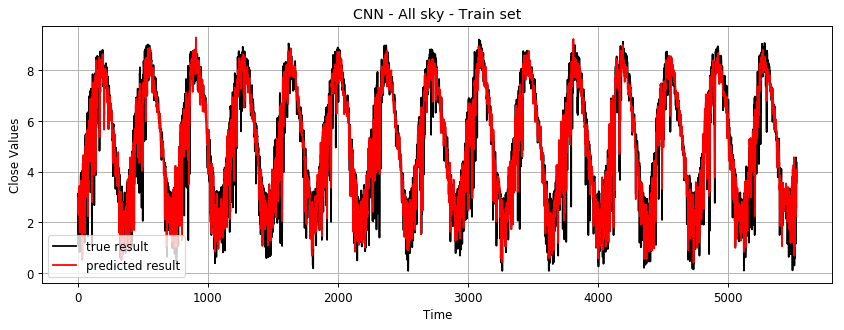

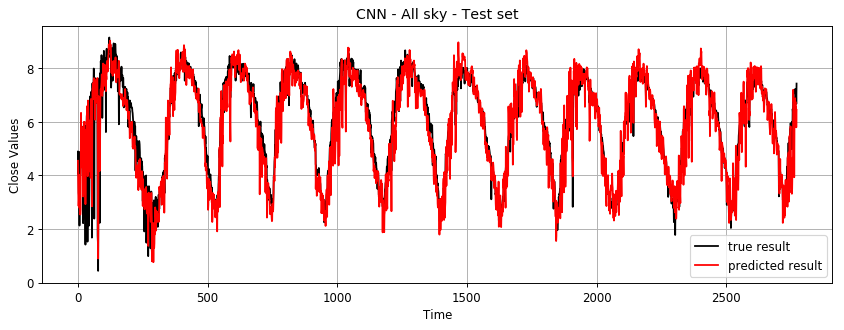

In [50]:
predicted_datacnn1=model1.predict(X_train)
plt.figure(figsize=(12,4), dpi=85, facecolor='w', edgecolor='k')
plt.plot(y1_train,color="k",label="true result")
plt.plot(predicted_datacnn1,color="r",label="predicted result")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Close Values")
plt.grid(True)
plt.title("CNN - All sky - Train set")
plt.show()
predicted_datacnn12=model1.predict(X_test)
plt.figure(figsize=(12,4), dpi=85, facecolor='w', edgecolor='k')
plt.plot(y1_test,color="k",label="true result")
plt.plot(predicted_datacnn12,color="r",label="predicted result")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Close Values")
plt.title("CNN - All sky - Test set")
plt.grid(True)
plt.show()

In [51]:
model2 = Sequential()
model2.add(Conv1D(filters=64, kernel_size=4, activation='relu', input_shape=(11, 1)))
model2.add(Conv1D(filters=128, kernel_size=8, activation='relu'))
model2.add(Dropout(2.0))
model2.add(Flatten())
model2.add(Dense(100, activation='relu'))
model2.add(Dense(50, activation='relu'))
model2.add(Dense(1))
model2.compile(optimizer='adam', loss='mse')
model2.fit(X_train, y2_train,batch_size=550, epochs=100, verbose=2, validation_split=0.1)
model2.evaluate(X_test, y2_test, verbose = 1)

Train on 4977 samples, validate on 553 samples
Epoch 1/100
 - 1s - loss: 32.9092 - val_loss: 12.0123
Epoch 2/100
 - 0s - loss: 10.1149 - val_loss: 8.5128
Epoch 3/100
 - 0s - loss: 5.0936 - val_loss: 3.1396
Epoch 4/100
 - 0s - loss: 4.1221 - val_loss: 3.3144
Epoch 5/100
 - 0s - loss: 3.2115 - val_loss: 2.4010
Epoch 6/100
 - 0s - loss: 2.7408 - val_loss: 2.5900
Epoch 7/100
 - 0s - loss: 2.3908 - val_loss: 1.9952
Epoch 8/100
 - 0s - loss: 2.1580 - val_loss: 1.9789
Epoch 9/100
 - 0s - loss: 1.9471 - val_loss: 1.6721
Epoch 10/100
 - 0s - loss: 1.7760 - val_loss: 1.5342
Epoch 11/100
 - 0s - loss: 1.6116 - val_loss: 1.4385
Epoch 12/100
 - 0s - loss: 1.4689 - val_loss: 1.3201
Epoch 13/100
 - 0s - loss: 1.3410 - val_loss: 1.1223
Epoch 14/100
 - 0s - loss: 1.2427 - val_loss: 0.9934
Epoch 15/100
 - 0s - loss: 1.1424 - val_loss: 0.8755
Epoch 16/100
 - 0s - loss: 1.0994 - val_loss: 0.8348
Epoch 17/100
 - 0s - loss: 1.0034 - val_loss: 0.7331
Epoch 18/100
 - 0s - loss: 0.9457 - val_loss: 0.6927
Epoch

0.17694265073942073

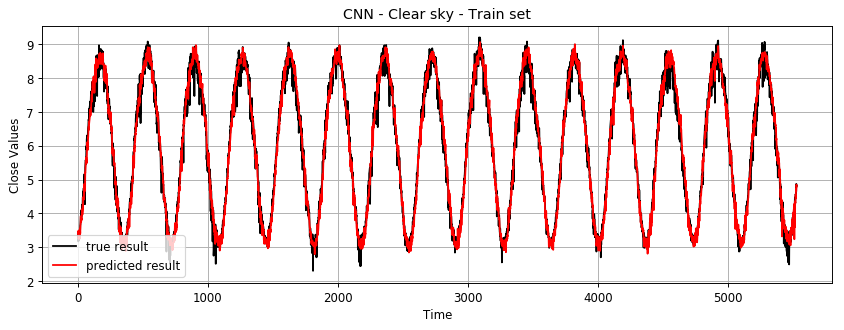

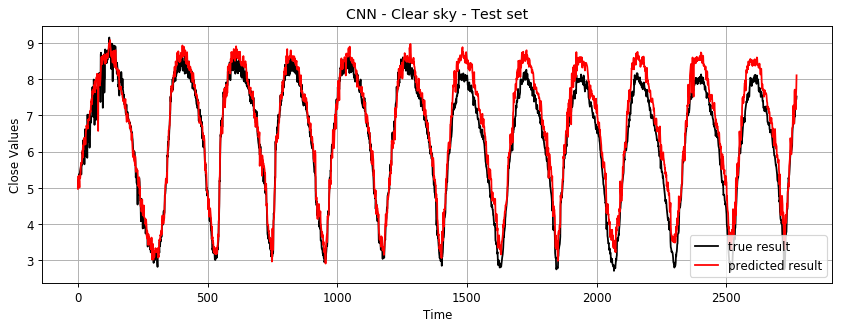

In [76]:
predicted_datacnn2=model2.predict(X_train)
plt.figure(figsize=(12,4), dpi=85, facecolor='w', edgecolor='k')
plt.plot(y2_train,color="k",label="true result")
plt.plot(predicted_datacnn2,color="r",label="predicted result")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Close Values")
plt.grid(True)
plt.title("CNN - Clear sky - Train set")
plt.show()
predicted_datacnn22=model2.predict(X_test)
plt.figure(figsize=(12,4), dpi=85, facecolor='w', edgecolor='k')
plt.plot(y2_test,color="k",label="true result")
plt.plot(predicted_datacnn22,color="r",label="predicted result")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Close Values")
plt.title("CNN - Clear sky - Test set")
plt.grid(True)
plt.show()

In [53]:
model3 = Sequential()
model3.add(Conv1D(filters=64, kernel_size=4, activation='relu', input_shape=(11, 1)))
model3.add(Conv1D(filters=128, kernel_size=8, activation='relu'))
model3.add(Dropout(2.0))
model3.add(Flatten())
model3.add(Dense(100, activation='relu'))
model3.add(Dense(50, activation='relu'))
model3.add(Dense(1))
model3.compile(optimizer='adam', loss='mse')
model3.fit(X_train, y3_train,batch_size=550, epochs=100, verbose=2, validation_split=0.1)
model3.evaluate(X_test, y3_test, verbose = 1)

Train on 4977 samples, validate on 553 samples
Epoch 1/100
 - 1s - loss: 56.6321 - val_loss: 28.6348
Epoch 2/100
 - 0s - loss: 13.9004 - val_loss: 12.3397
Epoch 3/100
 - 0s - loss: 6.5319 - val_loss: 4.7194
Epoch 4/100
 - 0s - loss: 4.2754 - val_loss: 2.9812
Epoch 5/100
 - 0s - loss: 3.0262 - val_loss: 2.4794
Epoch 6/100
 - 0s - loss: 2.3126 - val_loss: 2.0829
Epoch 7/100
 - 0s - loss: 1.9395 - val_loss: 1.9375
Epoch 8/100
 - 0s - loss: 1.7123 - val_loss: 1.6918
Epoch 9/100
 - 0s - loss: 1.5284 - val_loss: 1.6125
Epoch 10/100
 - 0s - loss: 1.3816 - val_loss: 1.4559
Epoch 11/100
 - 0s - loss: 1.2599 - val_loss: 1.3985
Epoch 12/100
 - 0s - loss: 1.1681 - val_loss: 1.2268
Epoch 13/100
 - 0s - loss: 1.0726 - val_loss: 1.1616
Epoch 14/100
 - 0s - loss: 0.9860 - val_loss: 1.0773
Epoch 15/100
 - 0s - loss: 0.9139 - val_loss: 0.9924
Epoch 16/100
 - 0s - loss: 0.8485 - val_loss: 0.9517
Epoch 17/100
 - 0s - loss: 0.8033 - val_loss: 0.8153
Epoch 18/100
 - 0s - loss: 0.7352 - val_loss: 0.7736
Epoc

0.11001452386465252

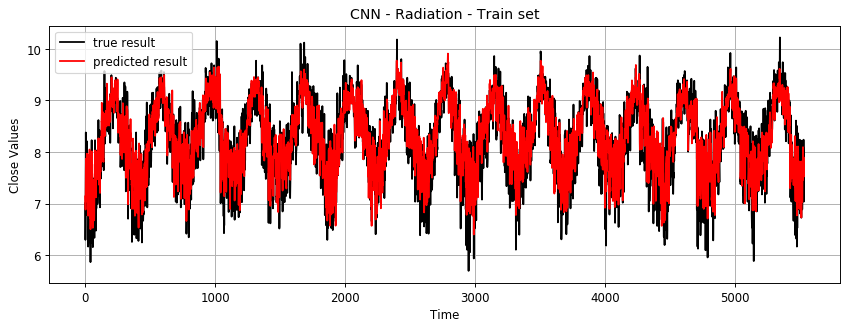

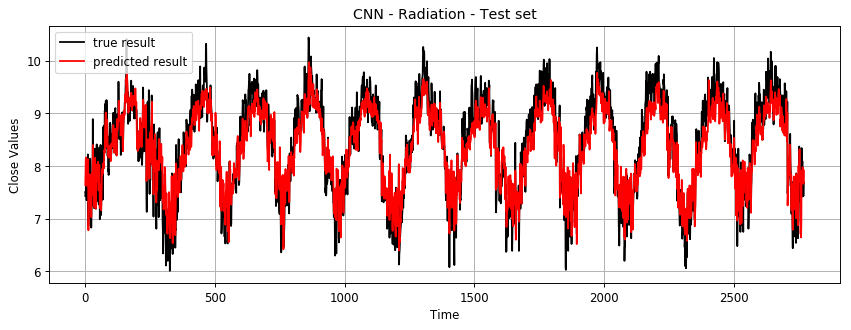

In [54]:
predicted_datacnn3=model3.predict(X_train)
plt.figure(figsize=(12,4), dpi=85, facecolor='w', edgecolor='k')
plt.plot(y3_train,color="k",label="true result")
plt.plot(predicted_datacnn3,color="r",label="predicted result")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Close Values")
plt.grid(True)
plt.title("CNN - Radiation - Train set")
plt.show()
predicted_datacnn32=model3.predict(X_test)
plt.figure(figsize=(12,4), dpi=85, facecolor='w', edgecolor='k')
plt.plot(y3_test,color="k",label="true result")
plt.plot(predicted_datacnn32,color="r",label="predicted result")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Close Values")
plt.title("CNN - Radiation - Test set")
plt.grid(True)
plt.show()

### LSTM

In [0]:
from keras.layers import LSTM

In [88]:
modelL1 = Sequential()
modelL1.add(LSTM(50, activation='relu', input_shape=(11, 1)))
modelL1.add(Dropout(1.5))
modelL1.add(Dense(1))
modelL1.compile(optimizer='adam', loss='mse')
modelL1.fit(X_train, y1_train, batch_size=1200, epochs=100, verbose=1, validation_split=0.1)
modelL1.evaluate(X_test, y1_test, verbose = 1)

Train on 4977 samples, validate on 553 samples
Epoch 1/100
4977/4977 [==============================] - 4s 803us/step - loss: 31.7163 - val_loss: 25.1219
Epoch 2/100
4977/4977 [==============================] - 0s 75us/step - loss: 31.0050 - val_loss: 24.3918
Epoch 3/100
4977/4977 [==============================] - 0s 70us/step - loss: 30.1448 - val_loss: 23.4741
Epoch 4/100
4977/4977 [==============================] - 0s 69us/step - loss: 29.0376 - val_loss: 22.1690
Epoch 5/100
4977/4977 [==============================] - 0s 70us/step - loss: 27.4137 - val_loss: 19.9839
Epoch 6/100
4977/4977 [==============================] - 0s 70us/step - loss: 24.6169 - val_loss: 16.9149
Epoch 7/100
4977/4977 [==============================] - 0s 69us/step - loss: 23.8089 - val_loss: 19.7976
Epoch 8/100
4977/4977 [==============================] - 0s 68us/step - loss: 18.8845 - val_loss: 14.4007
Epoch 9/100
4977/4977 [==============================] - 0s 68us/step - loss: 15.8453 - val_loss: 12.819

1.4361747694221927

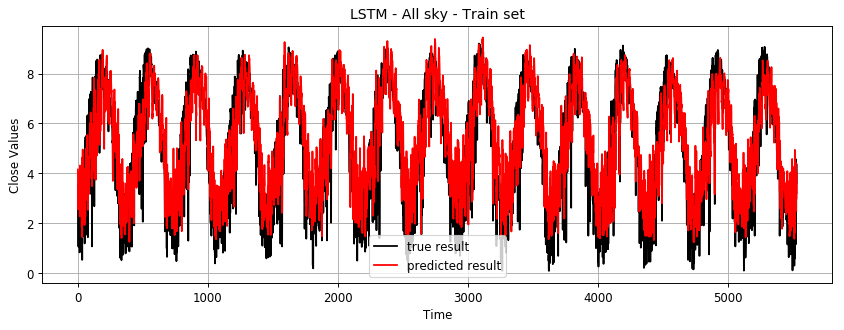

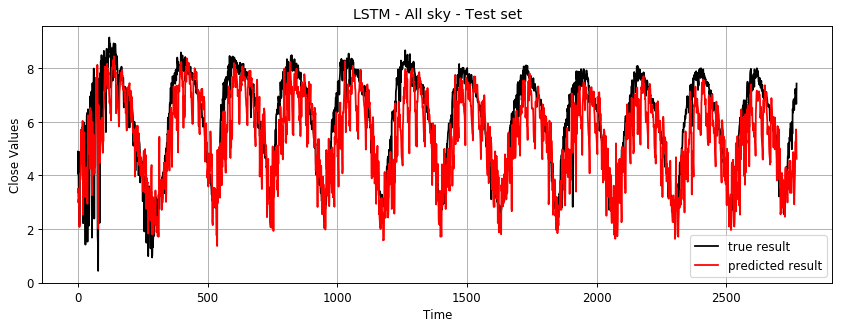

In [89]:
predicted_datalstm1=modelL1.predict(X_train)
plt.figure(figsize=(12,4), dpi=85, facecolor='w', edgecolor='k')
plt.plot(y1_train,color="k",label="true result")
plt.plot(predicted_datalstm1,color="r",label="predicted result")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Close Values")
plt.grid(True)
plt.title("LSTM - All sky - Train set")
plt.show()
predicted_datalstm12=modelL1.predict(X_test)
plt.figure(figsize=(12,4), dpi=85, facecolor='w', edgecolor='k')
plt.plot(y1_test,color="k",label="true result")
plt.plot(predicted_datalstm12,color="r",label="predicted result")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Close Values")
plt.title("LSTM - All sky - Test set")
plt.grid(True)
plt.show()

In [92]:
modelL2 = Sequential()
modelL2.add(LSTM(50, activation='relu', input_shape=(11, 1)))
modelL2.add(Dropout(1.5))
modelL2.add(Dense(1))
modelL2.compile(optimizer='adam', loss='mse')
modelL2.fit(X_train, y2_train, batch_size= 1000, epochs=50, verbose=1, validation_split=0.1)
modelL2.evaluate(X_test, y2_test, verbose = 1)

Train on 4977 samples, validate on 553 samples
Epoch 1/50
4977/4977 [==============================] - 4s 834us/step - loss: 39.3630 - val_loss: 32.2329
Epoch 2/50
4977/4977 [==============================] - 0s 69us/step - loss: 38.5828 - val_loss: 31.4756
Epoch 3/50
4977/4977 [==============================] - 0s 69us/step - loss: 37.7021 - val_loss: 30.6008
Epoch 4/50
4977/4977 [==============================] - 0s 68us/step - loss: 36.6406 - val_loss: 29.4745
Epoch 5/50
4977/4977 [==============================] - 0s 69us/step - loss: 35.1970 - val_loss: 27.8018
Epoch 6/50
4977/4977 [==============================] - 0s 71us/step - loss: 32.9085 - val_loss: 24.8716
Epoch 7/50
4977/4977 [==============================] - 0s 70us/step - loss: 28.8620 - val_loss: 21.7482
Epoch 8/50
4977/4977 [==============================] - 0s 73us/step - loss: 23.6360 - val_loss: 20.3995
Epoch 9/50
4977/4977 [==============================] - 0s 69us/step - loss: 19.2012 - val_loss: 15.3817
Epoch 1

1.3394952842167445

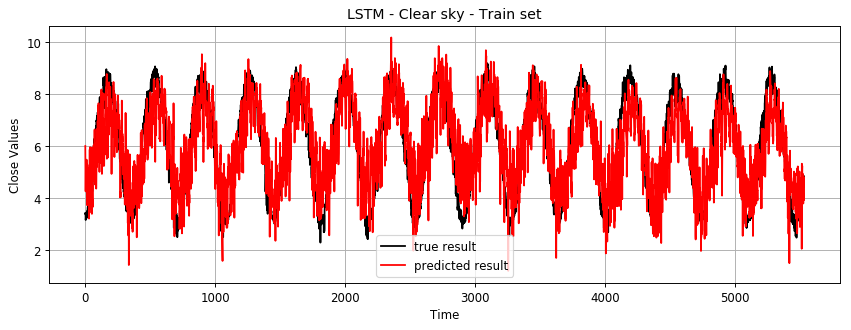

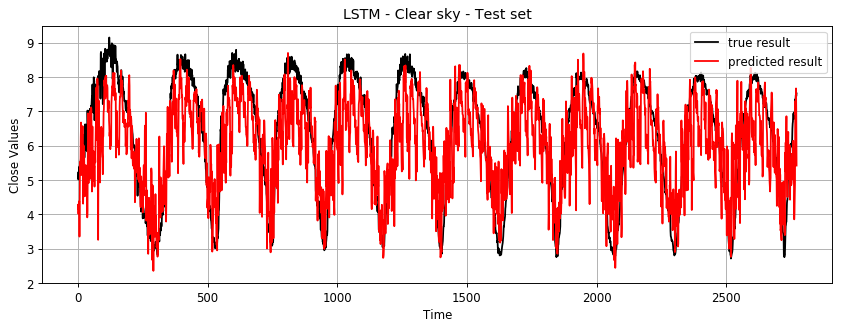

In [93]:
predicted_datalstm2=modelL2.predict(X_train)
plt.figure(figsize=(12,4), dpi=85, facecolor='w', edgecolor='k')
plt.plot(y2_train,color="k",label="true result")
plt.plot(predicted_datalstm2,color="r",label="predicted result")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Close Values")
plt.grid(True)
plt.title("LSTM - Clear sky - Train set")
plt.show()
predicted_datalstm22=modelL2.predict(X_test)
plt.figure(figsize=(12,4), dpi=85, facecolor='w', edgecolor='k')
plt.plot(y2_test,color="k",label="true result")
plt.plot(predicted_datalstm22,color="r",label="predicted result")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Close Values")
plt.title("LSTM - Clear sky - Test set")
plt.grid(True)
plt.show()

In [94]:
modelL3 = Sequential()
modelL3.add(LSTM(50, activation='relu', input_shape=(11, 1)))
modelL3.add(Dropout(1.5))
modelL3.add(Dense(1))
modelL3.compile(optimizer='adam', loss='mse')
modelL3.fit(X_train, y3_train, epochs=150, verbose=1, validation_split=0.1)
modelL3.evaluate(X_test, y3_test, verbose = 1)

Train on 4977 samples, validate on 553 samples
Epoch 1/150
4977/4977 [==============================] - 5s 1ms/step - loss: 49.8053 - val_loss: 28.6724
Epoch 2/150
4977/4977 [==============================] - 1s 282us/step - loss: 9.6161 - val_loss: 1.6095
Epoch 3/150
4977/4977 [==============================] - 1s 286us/step - loss: 0.7485 - val_loss: 0.5104
Epoch 4/150
4977/4977 [==============================] - 1s 286us/step - loss: 0.3636 - val_loss: 0.3181
Epoch 5/150
4977/4977 [==============================] - 1s 280us/step - loss: 0.2750 - val_loss: 0.2845
Epoch 6/150
4977/4977 [==============================] - 1s 289us/step - loss: 0.2353 - val_loss: 0.2316
Epoch 7/150
4977/4977 [==============================] - 1s 299us/step - loss: 0.2082 - val_loss: 0.2141
Epoch 8/150
4977/4977 [==============================] - 1s 291us/step - loss: 0.1973 - val_loss: 0.2205
Epoch 9/150
4977/4977 [==============================] - 1s 286us/step - loss: 0.1946 - val_loss: 0.2145
Epoch 10

0.08662590530699638

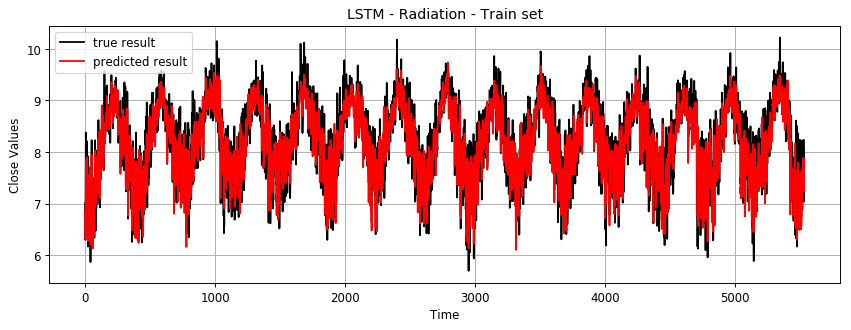

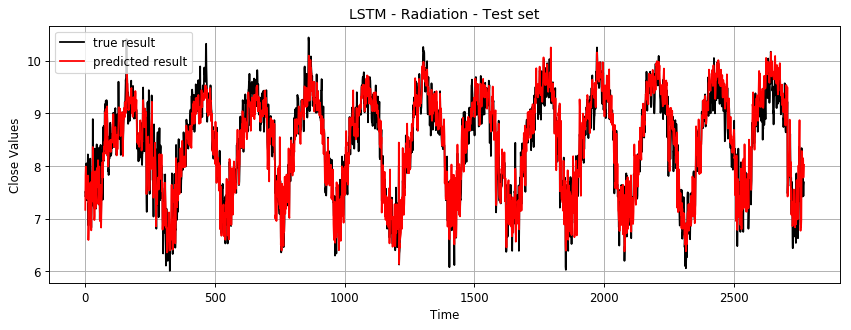

In [95]:
predicted_datalstm3=modelL3.predict(X_train)
plt.figure(figsize=(12,4), dpi=85, facecolor='w', edgecolor='k')
plt.plot(y3_train,color="k",label="true result")
plt.plot(predicted_datalstm3,color="r",label="predicted result")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Close Values")
plt.grid(True)
plt.title("LSTM - Radiation - Train set")
plt.show()
predicted_datalstm32=modelL3.predict(X_test)
plt.figure(figsize=(12,4), dpi=85, facecolor='w', edgecolor='k')
plt.plot(y3_test,color="k",label="true result")
plt.plot(predicted_datalstm32,color="r",label="predicted result")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Close Values")
plt.title("LSTM - Radiation - Test set")
plt.grid(True)
plt.show()

### LSTM combined CNN

In [0]:
from keras.layers import TimeDistributed

In [97]:
modellscnn1= Sequential()
modellscnn1.add(Conv1D(filters=64, kernel_size=4, activation='relu', input_shape=(11, 1)))
modellscnn1.add(Conv1D(filters=128, kernel_size=8, activation='relu'))
modellscnn1.add(Conv1D(filters=64, kernel_size=1, activation='relu'))
modellscnn1.add(TimeDistributed(Flatten()))
modellscnn1.add(LSTM(50, activation='relu'))
modellscnn1.add(Dense(50, activation='relu'))
modellscnn1.add(Dense(1))
modellscnn1.compile(optimizer='adam', loss='mse')
modellscnn1.fit(X_train, y1_train, batch_size=150, epochs=100 , verbose=2, validation_split=0.1)
modellscnn1.evaluate(X_test, y1_test, verbose = 1)

Train on 4977 samples, validate on 553 samples
Epoch 1/100
 - 5s - loss: 20.5319 - val_loss: 3.6543
Epoch 2/100
 - 0s - loss: 2.6764 - val_loss: 1.4631
Epoch 3/100
 - 0s - loss: 1.3345 - val_loss: 0.7459
Epoch 4/100
 - 0s - loss: 0.8959 - val_loss: 0.7330
Epoch 5/100
 - 0s - loss: 0.8036 - val_loss: 0.6986
Epoch 6/100
 - 0s - loss: 0.7477 - val_loss: 0.5681
Epoch 7/100
 - 0s - loss: 0.6167 - val_loss: 0.6775
Epoch 8/100
 - 0s - loss: 0.5882 - val_loss: 0.4704
Epoch 9/100
 - 0s - loss: 0.5419 - val_loss: 0.4863
Epoch 10/100
 - 0s - loss: 0.5159 - val_loss: 0.5660
Epoch 11/100
 - 0s - loss: 0.4830 - val_loss: 0.6324
Epoch 12/100
 - 0s - loss: 0.4565 - val_loss: 0.5846
Epoch 13/100
 - 0s - loss: 0.4810 - val_loss: 0.5759
Epoch 14/100
 - 0s - loss: 0.4552 - val_loss: 0.4233
Epoch 15/100
 - 0s - loss: 0.4339 - val_loss: 0.4645
Epoch 16/100
 - 0s - loss: 0.4384 - val_loss: 0.4928
Epoch 17/100
 - 0s - loss: 0.4365 - val_loss: 0.4130
Epoch 18/100
 - 0s - loss: 0.4258 - val_loss: 0.4352
Epoch 1

0.3763256859985781

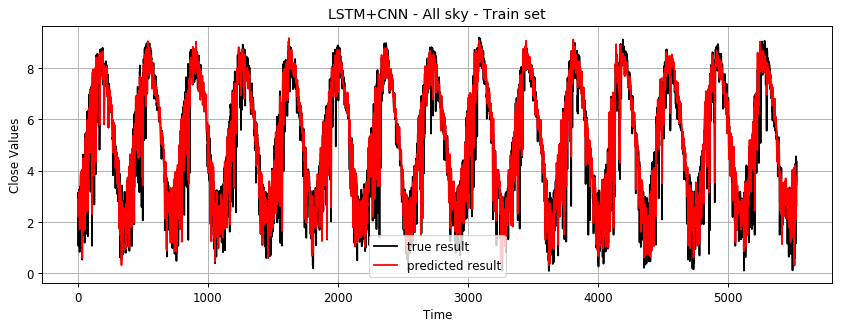

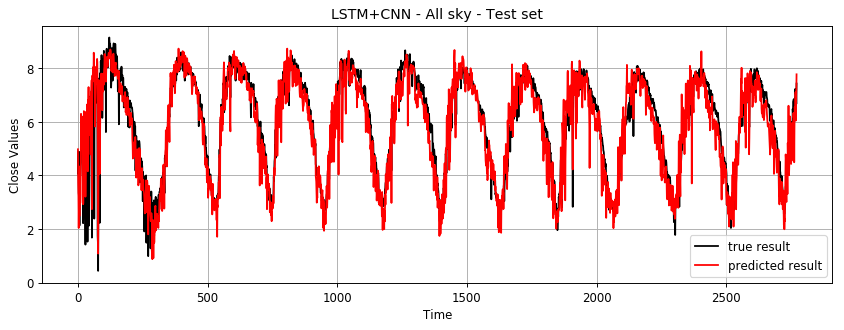

In [98]:
predicted_datalscnn1=modellscnn1.predict(X_train)
plt.figure(figsize=(12,4), dpi=85, facecolor='w', edgecolor='k')
plt.plot(y1_train,color="k",label="true result")
plt.plot(predicted_datalscnn1,color="r",label="predicted result")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Close Values")
plt.grid(True)
plt.title("LSTM+CNN - All sky - Train set")
plt.show()
predicted_datalscnn12=modellscnn1.predict(X_test)
plt.figure(figsize=(12,4), dpi=85, facecolor='w', edgecolor='k')
plt.plot(y1_test,color="k",label="true result")
plt.plot(predicted_datalscnn12,color="r",label="predicted result")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Close Values")
plt.title("LSTM+CNN - All sky - Test set")
plt.grid(True)
plt.show()

In [99]:
modellscnn2 = Sequential()
modellscnn2.add(Conv1D(filters=64, kernel_size=4, activation='relu', input_shape=(11, 1)))
modellscnn2.add(Conv1D(filters=128, kernel_size=8, activation='relu'))
modellscnn2.add(Conv1D(filters=64, kernel_size=1, activation='relu'))
modellscnn2.add(TimeDistributed(Flatten()))
modellscnn2.add(LSTM(50, activation='relu'))
modellscnn2.add(Dense(50, activation='relu'))
modellscnn2.add(Dense(1))
modellscnn2.compile(optimizer='adam', loss='mse')
modellscnn2.fit(X_train, y2_train, batch_size=150, epochs=100 , verbose=2, validation_split=0.1)
modellscnn2.evaluate(X_test, y2_test, verbose = 1)

Train on 4977 samples, validate on 553 samples
Epoch 1/100
 - 5s - loss: 23.5973 - val_loss: 4.1311
Epoch 2/100
 - 0s - loss: 3.3011 - val_loss: 1.6550
Epoch 3/100
 - 0s - loss: 1.4777 - val_loss: 0.9150
Epoch 4/100
 - 0s - loss: 0.8466 - val_loss: 0.5619
Epoch 5/100
 - 0s - loss: 0.6701 - val_loss: 0.3922
Epoch 6/100
 - 0s - loss: 0.5712 - val_loss: 0.3477
Epoch 7/100
 - 0s - loss: 0.4581 - val_loss: 0.5392
Epoch 8/100
 - 0s - loss: 0.4853 - val_loss: 0.3051
Epoch 9/100
 - 0s - loss: 0.3192 - val_loss: 0.2204
Epoch 10/100
 - 0s - loss: 0.2776 - val_loss: 0.2106
Epoch 11/100
 - 0s - loss: 0.2019 - val_loss: 0.1917
Epoch 12/100
 - 0s - loss: 0.1470 - val_loss: 0.1430
Epoch 13/100
 - 0s - loss: 0.1187 - val_loss: 0.1257
Epoch 14/100
 - 0s - loss: 0.1056 - val_loss: 0.1001
Epoch 15/100
 - 0s - loss: 0.0913 - val_loss: 0.1161
Epoch 16/100
 - 0s - loss: 0.0867 - val_loss: 0.0891
Epoch 17/100
 - 0s - loss: 0.0769 - val_loss: 0.0850
Epoch 18/100
 - 0s - loss: 0.0770 - val_loss: 0.0957
Epoch 1

0.06175687972558353

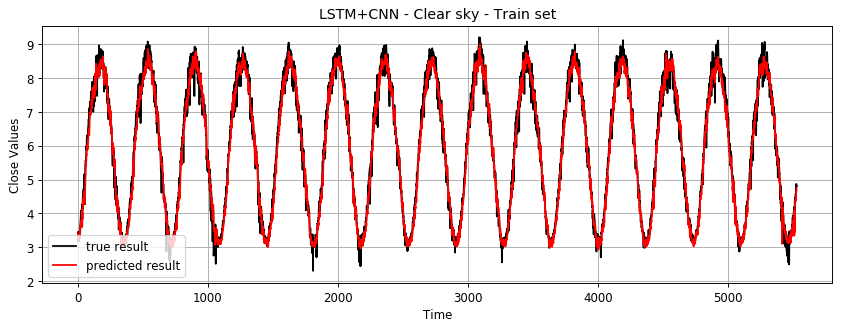

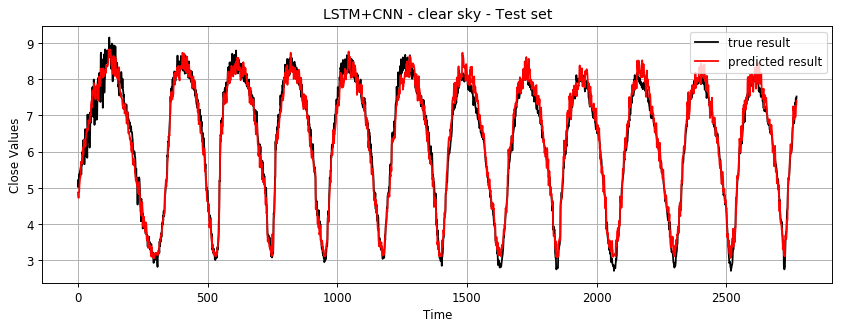

In [107]:
predicted_datalscnn2=modellscnn2.predict(X_train)
plt.figure(figsize=(12,4), dpi=85, facecolor='w', edgecolor='k')
plt.plot(y2_train,color="k",label="true result")
plt.plot(predicted_datalscnn2,color="r",label="predicted result")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Close Values")
plt.grid(True)
plt.title("LSTM+CNN - Clear sky - Train set")
plt.show()
predicted_datalscnn22=modellscnn2.predict(X_test)
plt.figure(figsize=(12,4), dpi=85, facecolor='w', edgecolor='k')
plt.plot(y2_test,color="k",label="true result")
plt.plot(predicted_datalscnn22,color="r",label="predicted result")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Close Values")
plt.title("LSTM+CNN - clear sky - Test set")
plt.grid(True)
plt.show()

In [101]:
modellscnn3 = Sequential()
modellscnn3.add(Conv1D(filters=64, kernel_size=4, activation='relu', input_shape=(11, 1)))
modellscnn3.add(Conv1D(filters=128, kernel_size=8, activation='relu'))
modellscnn3.add(Conv1D(filters=64, kernel_size=1, activation='relu'))
modellscnn3.add(TimeDistributed(Flatten()))
modellscnn3.add(LSTM(50, activation='relu'))
modellscnn3.add(Dense(50, activation='relu'))
modellscnn3.add(Dense(1))
modellscnn3.compile(optimizer='adam', loss='mse')
modellscnn3.fit(X_train, y3_train, batch_size=150, epochs=100 , verbose=2, validation_split=0.1)
modellscnn3.evaluate(X_test, y3_test, verbose = 1)

Train on 4977 samples, validate on 553 samples
Epoch 1/100
 - 6s - loss: 37.5422 - val_loss: 6.4879
Epoch 2/100
 - 0s - loss: 3.1319 - val_loss: 1.3243
Epoch 3/100
 - 0s - loss: 0.5509 - val_loss: 0.2336
Epoch 4/100
 - 0s - loss: 0.1738 - val_loss: 0.1804
Epoch 5/100
 - 0s - loss: 0.1498 - val_loss: 0.1496
Epoch 6/100
 - 0s - loss: 0.1386 - val_loss: 0.1365
Epoch 7/100
 - 0s - loss: 0.1210 - val_loss: 0.1381
Epoch 8/100
 - 0s - loss: 0.1183 - val_loss: 0.1386
Epoch 9/100
 - 0s - loss: 0.1174 - val_loss: 0.1281
Epoch 10/100
 - 0s - loss: 0.1103 - val_loss: 0.1331
Epoch 11/100
 - 0s - loss: 0.1100 - val_loss: 0.1307
Epoch 12/100
 - 0s - loss: 0.1103 - val_loss: 0.1327
Epoch 13/100
 - 0s - loss: 0.1079 - val_loss: 0.1618
Epoch 14/100
 - 0s - loss: 0.1081 - val_loss: 0.1377
Epoch 15/100
 - 0s - loss: 0.1075 - val_loss: 0.1251
Epoch 16/100
 - 0s - loss: 0.1085 - val_loss: 0.1336
Epoch 17/100
 - 0s - loss: 0.1031 - val_loss: 0.1363
Epoch 18/100
 - 0s - loss: 0.1032 - val_loss: 0.1278
Epoch 1

0.13579019581600701

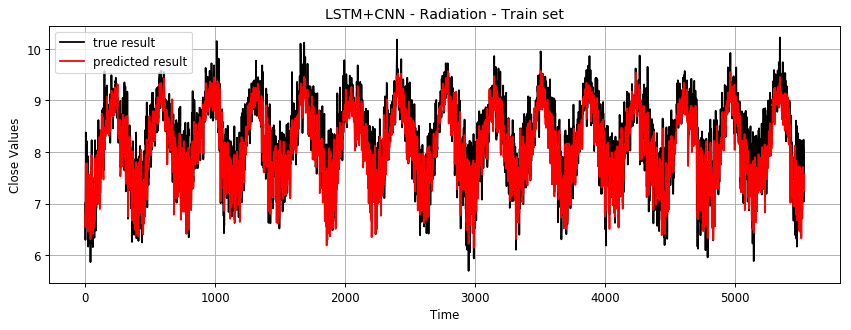

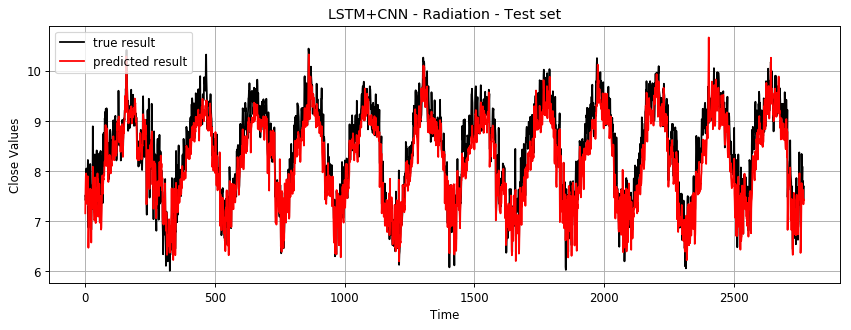

In [102]:
predicted_datalscnn3=modellscnn3.predict(X_train)
plt.figure(figsize=(12,4), dpi=85, facecolor='w', edgecolor='k')
plt.plot(y3_train,color="k",label="true result")
plt.plot(predicted_datalscnn3,color="r",label="predicted result")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Close Values")
plt.grid(True)
plt.title("LSTM+CNN - Radiation - Train set")
plt.show()
predicted_datalscnn32=modellscnn3.predict(X_test)
plt.figure(figsize=(12,4), dpi=85, facecolor='w', edgecolor='k')
plt.plot(y3_test,color="k",label="true result")
plt.plot(predicted_datalscnn32,color="r",label="predicted result")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Close Values")
plt.title("LSTM+CNN - Radiation - Test set")
plt.grid(True)
plt.show()

### RNN

In [0]:
from keras.layers import SimpleRNN

In [70]:
modelrnn1 = Sequential()
modelrnn1.add(SimpleRNN(50, activation='relu', input_shape=(11, 1)))
modelrnn1.add(Dropout(2.0))
modelrnn1.add(Dense(100))
modelrnn1.add(Dense(1))
modelrnn1.compile(optimizer='adam', loss='mse')
modelrnn1.fit(X_train,y1_train,epochs=100,batch_size=64, verbose=2, validation_split=0.1)
modelrnn1.evaluate(X_test, y1_test, verbose = 1)

Train on 4977 samples, validate on 553 samples
Epoch 1/100
 - 2s - loss: 7.9336 - val_loss: 2.3661
Epoch 2/100
 - 0s - loss: 1.7521 - val_loss: 1.3119
Epoch 3/100
 - 0s - loss: 1.1335 - val_loss: 1.1707
Epoch 4/100
 - 0s - loss: 0.8213 - val_loss: 1.0098
Epoch 5/100
 - 0s - loss: 0.6998 - val_loss: 0.9880
Epoch 6/100
 - 0s - loss: 0.6166 - val_loss: 0.8627
Epoch 7/100
 - 0s - loss: 0.5534 - val_loss: 0.5556
Epoch 8/100
 - 0s - loss: 0.5157 - val_loss: 0.4873
Epoch 9/100
 - 0s - loss: 0.5047 - val_loss: 0.5439
Epoch 10/100
 - 0s - loss: 0.5232 - val_loss: 0.4680
Epoch 11/100
 - 0s - loss: 0.4943 - val_loss: 0.4385
Epoch 12/100
 - 0s - loss: 0.5106 - val_loss: 0.5003
Epoch 13/100
 - 0s - loss: 0.4732 - val_loss: 0.4790
Epoch 14/100
 - 0s - loss: 0.4826 - val_loss: 0.5260
Epoch 15/100
 - 0s - loss: 0.4738 - val_loss: 0.5337
Epoch 16/100
 - 0s - loss: 0.4744 - val_loss: 0.4519
Epoch 17/100
 - 0s - loss: 0.4567 - val_loss: 0.5706
Epoch 18/100
 - 0s - loss: 0.4569 - val_loss: 0.5222
Epoch 19

0.5919377587058328

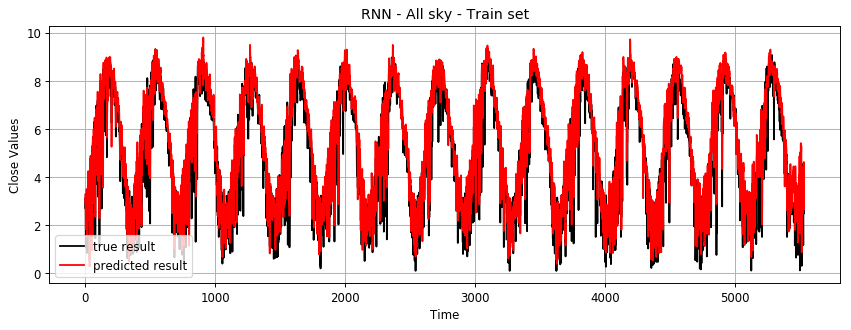

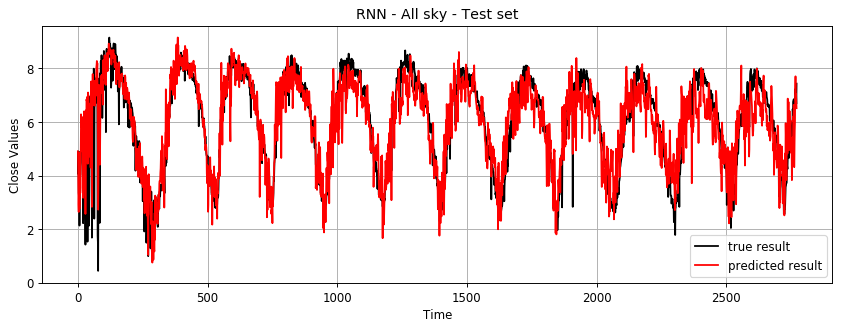

In [108]:
predicted_datarnn1=modelrnn1.predict(X_train)
plt.figure(figsize=(12,4), dpi=85, facecolor='w', edgecolor='k')
plt.plot(y1_train,color="k",label="true result")
plt.plot(predicted_datarnn1,color="r",label="predicted result")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Close Values")
plt.grid(True)
plt.title("RNN - All sky - Train set")
plt.show()
predicted_datarnn12=modelrnn1.predict(X_test)
plt.figure(figsize=(12,4), dpi=85, facecolor='w', edgecolor='k')
plt.plot(y1_test,color="k",label="true result")
plt.plot(predicted_datarnn12,color="r",label="predicted result")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Close Values")
plt.title("RNN - All sky - Test set")
plt.grid(True)
plt.show()

In [120]:
modelrnn2 = Sequential()
modelrnn2.add(SimpleRNN(50, activation='relu', input_shape=(11, 1)))
modelrnn2.add(Dropout(2.0))
modelrnn2.add(Dense(100))
modelrnn2.add(Dense(1))
modelrnn2.compile(optimizer='adam', loss='mse')
modelrnn2.fit(X_train,y2_train,epochs=10,batch_size=64, verbose=1, validation_split=0.1)
modelrnn2.evaluate(X_test, y2_test, verbose = 1)

Train on 4977 samples, validate on 553 samples
Epoch 1/10
4977/4977 [==============================] - 6s 1ms/step - loss: 9.6122 - val_loss: 2.5213
Epoch 2/10
4977/4977 [==============================] - 0s 59us/step - loss: 1.9934 - val_loss: 0.8252
Epoch 3/10
4977/4977 [==============================] - 0s 58us/step - loss: 0.8507 - val_loss: 0.7069
Epoch 4/10
4977/4977 [==============================] - 0s 59us/step - loss: 0.5659 - val_loss: 0.5576
Epoch 5/10
4977/4977 [==============================] - 0s 57us/step - loss: 0.3659 - val_loss: 0.5158
Epoch 6/10
4977/4977 [==============================] - 0s 59us/step - loss: 0.2708 - val_loss: 0.3511
Epoch 7/10
4977/4977 [==============================] - 0s 59us/step - loss: 0.1997 - val_loss: 0.4346
Epoch 8/10
4977/4977 [==============================] - 0s 56us/step - loss: 0.1634 - val_loss: 0.2147
Epoch 9/10
4977/4977 [==============================] - 0s 59us/step - loss: 0.1527 - val_loss: 0.1972
Epoch 10/10
2772/2772 [====

0.38520850613175706

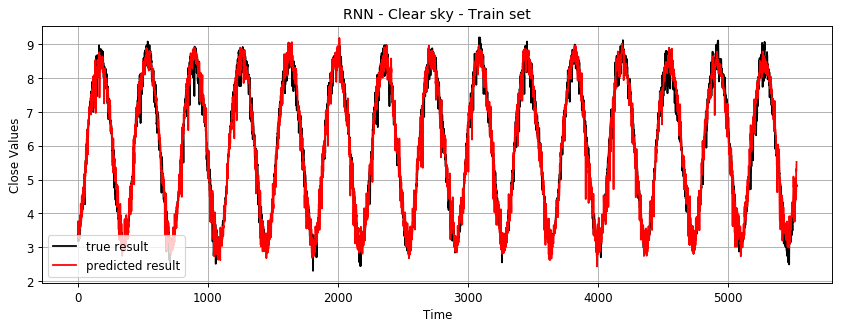

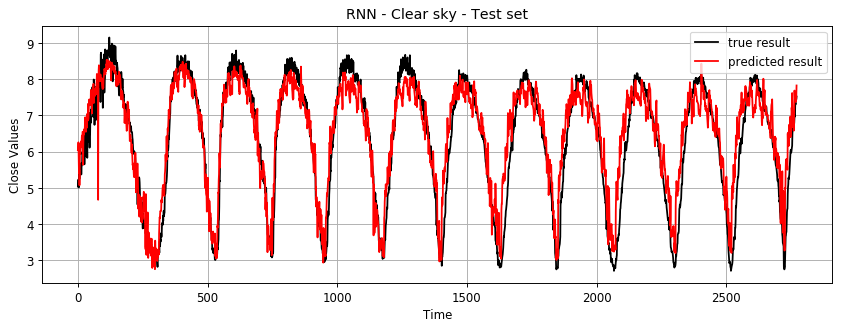

In [121]:
predicted_datarnn2=modelrnn2.predict(X_train)
plt.figure(figsize=(12,4), dpi=85, facecolor='w', edgecolor='k')
plt.plot(y2_train,color="k",label="true result")
plt.plot(predicted_datarnn2,color="r",label="predicted result")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Close Values")
plt.grid(True)
plt.title("RNN - Clear sky - Train set")
plt.show()
predicted_datarnn22=modelrnn2.predict(X_test)
plt.figure(figsize=(12,4), dpi=85, facecolor='w', edgecolor='k')
plt.plot(y2_test,color="k",label="true result")
plt.plot(predicted_datarnn22,color="r",label="predicted result")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Close Values")
plt.title("RNN - Clear sky - Test set")
plt.grid(True)
plt.show()

In [125]:
modelrnn3 = Sequential()
modelrnn3.add(SimpleRNN(50, activation='relu', input_shape=(11, 1)))
modelrnn3.add(Dropout(1.0))
modelrnn3.add(Dense(100))
modelrnn3.add(Dense(1))
modelrnn3.compile(optimizer='adam', loss='mse')
modelrnn3.fit(X_train,y3_train,epochs=10,batch_size=64, verbose=1, validation_split=0.1)
modelrnn3.evaluate(X_test, y3_test, verbose = 1)

Train on 4977 samples, validate on 553 samples
Epoch 1/10
4977/4977 [==============================] - 6s 1ms/step - loss: 16.1082 - val_loss: 2.0131
Epoch 2/10
4977/4977 [==============================] - 0s 58us/step - loss: 1.2315 - val_loss: 0.6961
Epoch 3/10
4977/4977 [==============================] - 0s 59us/step - loss: 0.5553 - val_loss: 0.3623
Epoch 4/10
4977/4977 [==============================] - 0s 60us/step - loss: 0.3310 - val_loss: 0.2389
Epoch 5/10
4977/4977 [==============================] - 0s 59us/step - loss: 0.2362 - val_loss: 0.1955
Epoch 6/10
4977/4977 [==============================] - 0s 60us/step - loss: 0.1870 - val_loss: 0.1719
Epoch 7/10
4977/4977 [==============================] - 0s 59us/step - loss: 0.1615 - val_loss: 0.1900
Epoch 8/10
4977/4977 [==============================] - 0s 60us/step - loss: 0.1512 - val_loss: 0.1808
Epoch 9/10
4977/4977 [==============================] - 0s 62us/step - loss: 0.1354 - val_loss: 0.2497
Epoch 10/10
2772/2772 [===

0.3792075447275869

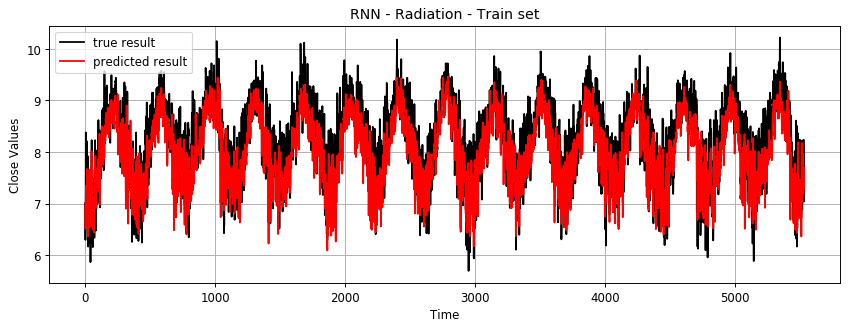

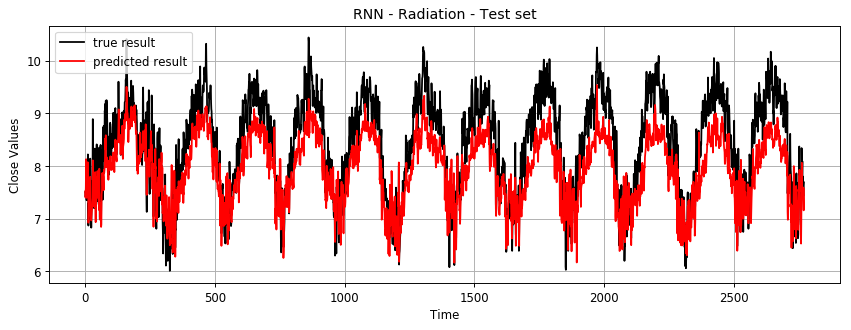

In [126]:
predicted_datarnn3=modelrnn3.predict(X_train)
plt.figure(figsize=(12,4), dpi=85, facecolor='w', edgecolor='k')
plt.plot(y3_train,color="k",label="true result")
plt.plot(predicted_datarnn3,color="r",label="predicted result")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Close Values")
plt.grid(True)
plt.title("RNN - Radiation - Train set")
plt.show()
predicted_datarnn32=modelrnn3.predict(X_test)
plt.figure(figsize=(12,4), dpi=85, facecolor='w', edgecolor='k')
plt.plot(y3_test,color="k",label="true result")
plt.plot(predicted_datarnn32,color="r",label="predicted result")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Close Values")
plt.title("RNN - Radiation - Test set")
plt.grid(True)
plt.show()

# Prediction of the coming day


`This section is done in order to be able predict the radiation of the coming day after 7 continuous days.`


## Importing the data and the target

In [0]:
dat_url='https://raw.githubusercontent.com/NurayVakitbilir/Project/master/Kalkanli%20data__v9.csv' #Input with target
featuresDB=pd.read_csv(dat_url)

In [128]:
featuresDB.head(10)

,Year,Month,Day,Rainfall,RH,Pressure,Temp,Min_T,Max_T,W_Speed,W_Direction
0,1992,1,1,0,65.82,99.31,8.16,7.22,9.70,8.33,337.27
1,1992,1,2,0,64.95,100.31,6.48,5.15,8.12,7.91,2.92
2,1992,1,3,0,64.31,100.77,7.96,5.19,10.23,4.85,20.17
3,1992,1,4,0,66.16,101.59,10.76,8.81,12.74,2.43,75.81
4,1992,1,5,0,79.61,101.40,12.10,9.92,14.64,4.84,259.60
5,1992,1,6,0,82.35,100.64,12.96,11.85,14.41,5.12,275.79
6,1992,1,7,0,72.27,100.64,12.41,10.57,14.12,4.39,35.75
7,1992,1,8,0,66.32,101.10,11.75,10.26,14.14,4.17,61.01
8,1992,1,9,0,68.07,100.91,11.39,9.83,14.02,4.14,54.57
9,1992,1,10,0,69.00,100.66,11.19,9.30,14.04,6.07,45.27


In [129]:
featuresDB.tail(10)

,Year,Month,Day,Rainfall,RH,Pressure,Temp,Min_T,Max_T,W_Speed,W_Direction
8298,2019,5,4,0,70.62,99.70,19.17,15.54,22.87,4.38,274.80
8299,2019,5,7,0,72.34,99.53,18.34,15.92,20.70,7.30,262.19
8300,2019,5,8,0,64.67,99.55,17.52,15.52,20.24,6.27,268.22
8301,2019,5,9,0,62.48,99.53,17.80,15.00,20.83,2.59,271.53
8302,2019,5,12,0,62.77,99.79,20.58,16.22,24.40,1.84,27.77
8303,2019,5,13,0,53.28,99.68,22.11,17.98,26.64,2.90,358.30
8304,2019,5,14,0,49.10,99.48,23.62,18.17,28.42,2.28,6.07
8305,2019,5,15,0,45.67,99.25,25.14,20.88,30.19,1.77,348.22
8306,2019,5,16,0,50.49,99.06,24.95,20.59,28.79,3.32,282.42
8307,2019,5,17,0,51.89,98.91,24.38,19.32,30.71,4.14,249.75


In [0]:
dat_url='https://raw.githubusercontent.com/NurayVakitbilir/Project/master/Kalkanli%20data__v9_target.csv'
radiationDB=pd.read_csv(dat_url)

## Scaling and splitting


```
The dataset consists of 8300 days. In order to obtain 7 days, 8295 days (1185 weeks) will be used, leaving out 5 days. The first 5530 days (790 weeks) will be used as training set and the rest (395 weeks) will be the testing set.
```



In [0]:
#Scaling the dataset from training set (first 5530 days)
mean = featuresDB[:5530].mean(axis=0)
featuresDB -= mean
std = featuresDB[:5530].std(axis=0)
featuresDB /= std

In [132]:
featuresDB[:5530].std()

Year           1.0
Month          1.0
Day            1.0
Rainfall       1.0
RH             1.0
Pressure       1.0
Temp           1.0
Min_T          1.0
Max_T          1.0
W_Speed        1.0
W_Direction    1.0
dtype: float64

In [133]:
featuresDB.mean()

Year           1.021982
Month          0.035930
Day            0.001228
Rainfall      -0.079739
RH            -0.124461
Pressure      -0.058287
Temp           0.138028
Min_T          0.140317
Max_T          0.135995
W_Speed       -0.053035
W_Direction    0.043591
dtype: float64

In [134]:
from numpy import split, array
 
# splitting the dataset into train/test sets
def split_dataset(data):
	# to split into standard weeks
	train, test = data[:5537], data[5531:-5]
	# restructure into windows of weekly data
	train = array(split(train, len(train)/7))
	test = array(split(test, len(test)/7))
	return train, test
 
train, test = split_dataset(featuresDB.values)
train.shape, test.shape

((791, 7, 11), (396, 7, 11))

In [0]:
def split_dataset2(data):
  train, test = data[:5523], data[5538:-5]
  return train, test

y_train, y_test = split_dataset2(radiationDB.values) #seperating the target

In [136]:
y_train[1]

array([7.])

In [0]:
#Making each sample continuous e.g. 1st sample: 1,2,3,4,5; 2nd sample: 2,3,4,5,6
def to_continuous(train, n_input, n_out=7):
	# flattening
	data = train.reshape((train.shape[0]*train.shape[1], train.shape[2]))
	X = list()
	in_start = 0
	for _ in range(len(data)):
		# define the end of the input sequence
		in_end = in_start + n_input
		out_end = in_end + n_out
		if out_end < len(data):
			X.append(data[in_start:in_end, :11])
		in_start += 1
	return array(X)
X_train = to_continuous(train, 7)
X_test = to_continuous(test, 7)

In [138]:
X_train[5515], X_test[2750], y_train[5522],y_test[2757]

(array([[ 1.81453274, -1.29037251, -1.10391965,  0.04647506,  1.01500656,
         -0.97188552, -1.6967626 , -1.57861562, -1.71572725,  0.45312103,
          0.56487774],
        [ 1.81453274, -1.29037251, -0.99026393, -0.30801746, -0.73681905,
          1.02764761, -1.46940422, -1.64655553, -1.42505777, -1.28532313,
          1.32516666],
        [ 1.81453274, -1.29037251, -0.87660822, -0.30801746,  0.22898719,
          1.53661968, -1.2575124 , -1.17777019, -1.27832558, -0.99202734,
         -1.34593101],
        [ 1.81453274, -1.29037251, -0.76295251, -0.30801746,  0.90099538,
          0.84587187, -1.19409952, -1.17777019, -1.23220975,  0.34113536,
         -1.58971828],
        [ 1.81453274, -1.29037251, -0.64929679, -0.30801746,  0.14457506,
          0.59138584, -1.05180721, -1.06057385, -1.07849031, -0.53341937,
         -1.83797783],
        [ 1.81453274, -1.29037251, -0.53564108, -0.30801746,  0.49647495,
          0.77316158, -1.03788731, -0.99433244, -0.99184845, -0.6080764

In [139]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5523, 7, 11), (2758, 7, 11), (5523, 1), (2758, 1))

##Predictions

### CNN

In [140]:
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]
modeldb = Sequential()
modeldb.add(Conv1D(filters=16, kernel_size=5, activation='relu', input_shape=(n_timesteps,n_features)))
modeldb.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
modeldb.add(Flatten())
modeldb.add(Dense(100, activation='relu'))
modeldb.add(Dense(n_outputs))
modeldb.compile(loss='mse', optimizer='adam')
modeldb.fit(X_train, y_train, batch_size=500, epochs=150, verbose = 1, validation_split=0.1)
modeldb.evaluate(X_test, y_test, verbose = 1)

Train on 4970 samples, validate on 553 samples
Epoch 1/150
4970/4970 [==============================] - 6s 1ms/step - loss: 65.4359 - val_loss: 53.5553
Epoch 2/150
4970/4970 [==============================] - 0s 13us/step - loss: 46.0491 - val_loss: 30.6515
Epoch 3/150
4970/4970 [==============================] - 0s 12us/step - loss: 19.9222 - val_loss: 10.1918
Epoch 4/150
4970/4970 [==============================] - 0s 12us/step - loss: 9.8673 - val_loss: 8.6445
Epoch 5/150
4970/4970 [==============================] - 0s 12us/step - loss: 6.6005 - val_loss: 6.0349
Epoch 6/150
4970/4970 [==============================] - 0s 12us/step - loss: 4.9423 - val_loss: 4.1126
Epoch 7/150
4970/4970 [==============================] - 0s 12us/step - loss: 3.6752 - val_loss: 3.0290
Epoch 8/150
4970/4970 [==============================] - 0s 13us/step - loss: 2.8743 - val_loss: 2.3650
Epoch 9/150
4970/4970 [==============================] - 0s 12us/step - loss: 2.3487 - val_loss: 2.5062
Epoch 10/150

0.4399781153632559

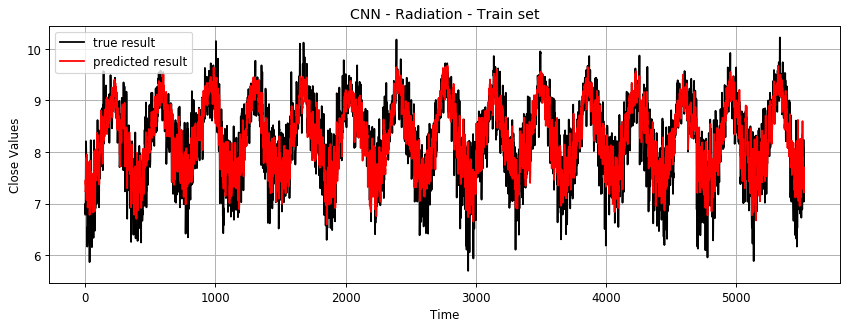

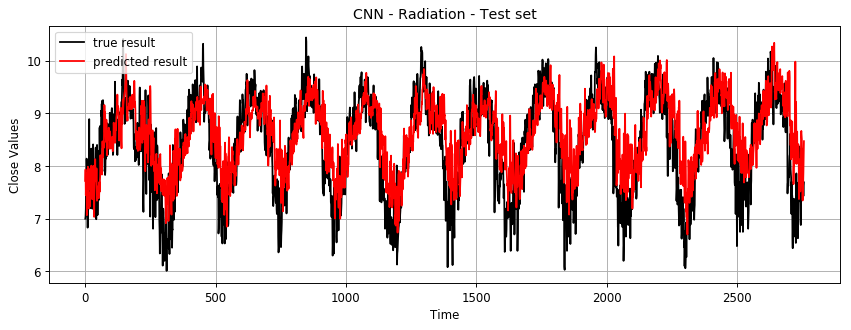

In [141]:
predicted_datacnnDB=modeldb.predict(X_train)
plt.figure(figsize=(12,4), dpi=85, facecolor='w', edgecolor='k')
plt.plot(y_train,color="k",label="true result")
plt.plot(predicted_datacnnDB,color="r",label="predicted result")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Close Values")
plt.grid(True)
plt.title("CNN - Radiation - Train set")
plt.show()
predicted_datacnnDB2=modeldb.predict(X_test)
plt.figure(figsize=(12,4), dpi=85, facecolor='w', edgecolor='k')
plt.plot(y_test,color="k",label="true result")
plt.plot(predicted_datacnnDB2,color="r",label="predicted result")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Close Values")
plt.title("CNN - Radiation - Test set")
plt.grid(True)
plt.show()

### LSTM

In [157]:
modeldbl = Sequential()
modeldbl.add(LSTM(50, activation='relu', input_shape=(n_timesteps,n_features)))
modeldbl.add(Dense(1))
modeldbl.compile(optimizer='adam', loss='mse')
modeldbl.fit(X_train, y_train, epochs=20, verbose=1,batch_size = 32, validation_split=0.2)
modeldbl.evaluate(X_test, y_test, verbose = 1)

Train on 4418 samples, validate on 1105 samples
Epoch 1/20
4418/4418 [==============================] - 8s 2ms/step - loss: 19.2044 - val_loss: 2.8101
Epoch 2/20
4418/4418 [==============================] - 1s 240us/step - loss: 0.9994 - val_loss: 0.8815
Epoch 3/20
4418/4418 [==============================] - 1s 245us/step - loss: 0.4493 - val_loss: 0.5163
Epoch 4/20
4418/4418 [==============================] - 1s 258us/step - loss: 0.2987 - val_loss: 0.3359
Epoch 5/20
4418/4418 [==============================] - 1s 245us/step - loss: 0.2349 - val_loss: 0.2451
Epoch 6/20
4418/4418 [==============================] - 1s 244us/step - loss: 0.2095 - val_loss: 0.2729
Epoch 7/20
4418/4418 [==============================] - 1s 236us/step - loss: 0.1982 - val_loss: 0.2343
Epoch 8/20
4418/4418 [==============================] - 1s 240us/step - loss: 0.1889 - val_loss: 0.2364
Epoch 9/20
4418/4418 [==============================] - 1s 249us/step - loss: 0.1789 - val_loss: 0.2195
Epoch 10/20
4418/

0.5134400017586542

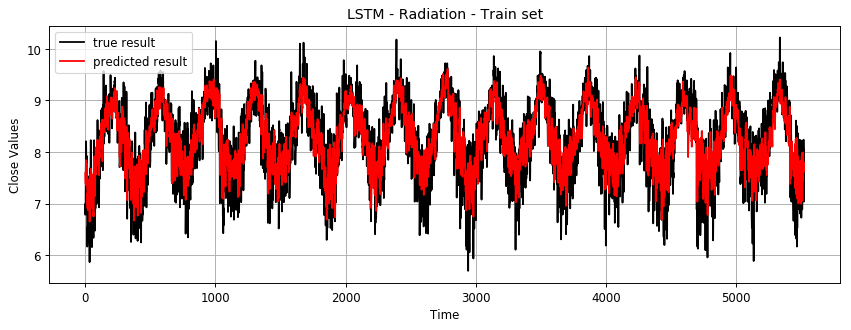

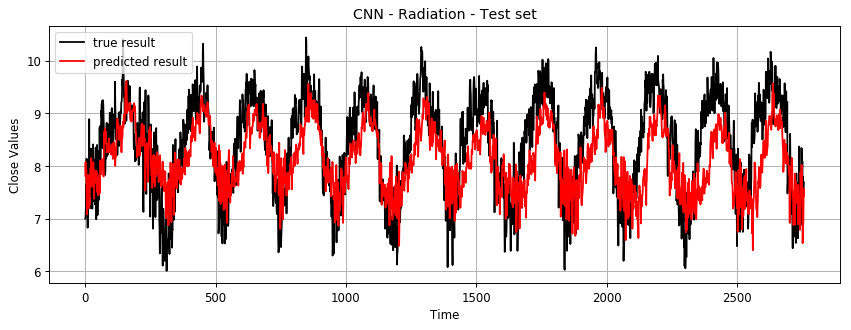

In [158]:
predicted_datalstmDB=modeldbl.predict(X_train)
plt.figure(figsize=(12,4), dpi=85, facecolor='w', edgecolor='k')
plt.plot(y_train,color="k",label="true result")
plt.plot(predicted_datalstmDB,color="r",label="predicted result")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Close Values")
plt.grid(True)
plt.title("LSTM - Radiation - Train set")
plt.show()
predicted_datalstmDB2=modeldbl.predict(X_test)
plt.figure(figsize=(12,4), dpi=85, facecolor='w', edgecolor='k')
plt.plot(y_test,color="k",label="true result")
plt.plot(predicted_datalstmDB2,color="r",label="predicted result")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Close Values")
plt.title("CNN - Radiation - Test set")
plt.grid(True)
plt.show()

### LSTM combined CNN

In [144]:
modellscn = Sequential()
modellscn.add(Conv1D(filters=64, kernel_size=4, activation='relu', input_shape=(n_timesteps,n_features)))
modellscn.add(Dropout(0.9))
modellscn.add(Conv1D(filters=156, kernel_size=1, activation='relu'))
modellscn.add(Dropout(1.5))
modellscn.add(TimeDistributed(Flatten()))
modellscn.add(LSTM(50, activation='relu'))
modellscn.add(Dense(50, activation='relu'))
modellscn.add(Dense(1))
modellscn.compile(optimizer='adam', loss='mse')
modellscn.fit(X_train, y_train, batch_size=550, epochs=100 , verbose=2, validation_split=0.2)
modellscn.evaluate(X_test, y_test, verbose = 1)

W0614 11:49:46.578926 139841118148480 nn_ops.py:4224] Large dropout rate: 0.9 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


Train on 4418 samples, validate on 1105 samples
Epoch 1/100
 - 7s - loss: 52.5090 - val_loss: 46.6464
Epoch 2/100
 - 0s - loss: 18.7161 - val_loss: 36.6628
Epoch 3/100
 - 0s - loss: 9.5481 - val_loss: 24.1420
Epoch 4/100
 - 0s - loss: 5.4668 - val_loss: 18.8161
Epoch 5/100
 - 0s - loss: 2.6192 - val_loss: 9.6404
Epoch 6/100
 - 0s - loss: 1.6181 - val_loss: 5.3276
Epoch 7/100
 - 0s - loss: 1.2383 - val_loss: 4.2133
Epoch 8/100
 - 0s - loss: 1.0139 - val_loss: 3.5886
Epoch 9/100
 - 0s - loss: 0.8345 - val_loss: 2.7641
Epoch 10/100
 - 0s - loss: 0.7444 - val_loss: 2.3897
Epoch 11/100
 - 0s - loss: 0.6490 - val_loss: 2.2108
Epoch 12/100
 - 0s - loss: 0.6283 - val_loss: 1.7440
Epoch 13/100
 - 0s - loss: 0.5972 - val_loss: 1.5898
Epoch 14/100
 - 0s - loss: 0.5364 - val_loss: 1.2393
Epoch 15/100
 - 0s - loss: 0.4961 - val_loss: 1.1182
Epoch 16/100
 - 0s - loss: 0.4846 - val_loss: 0.9457
Epoch 17/100
 - 0s - loss: 0.4585 - val_loss: 0.6933
Epoch 18/100
 - 0s - loss: 0.4654 - val_loss: 0.6019
E

0.3698649388306421

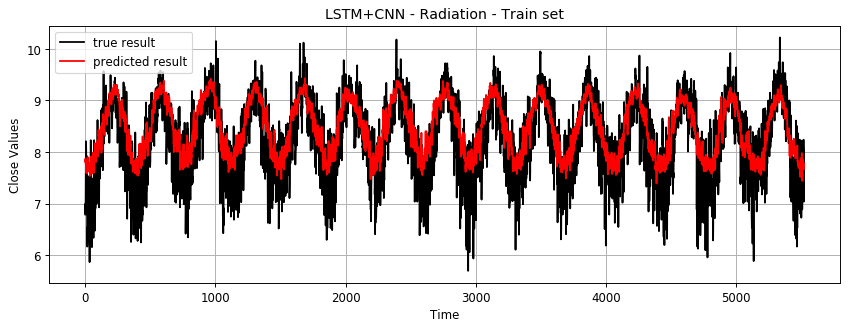

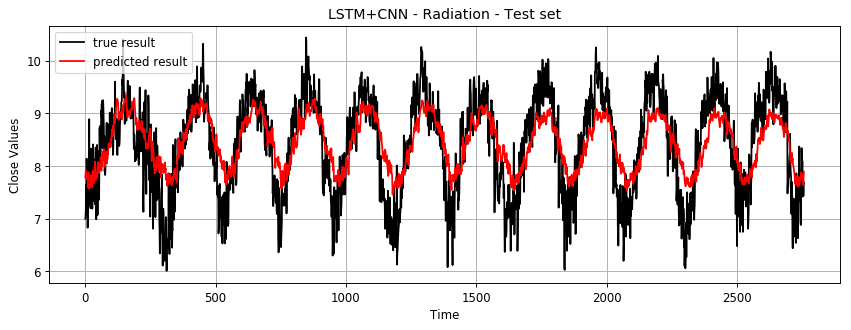

In [145]:
predicted_datalstmcnnDB=modellscn.predict(X_train)
plt.figure(figsize=(12,4), dpi=85, facecolor='w', edgecolor='k')
plt.plot(y_train,color="k",label="true result")
plt.plot(predicted_datalstmcnnDB,color="r",label="predicted result")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Close Values")
plt.grid(True)
plt.title("LSTM+CNN - Radiation - Train set")
plt.show()
predicted_datalstmcnnDB2=modellscn.predict(X_test)
plt.figure(figsize=(12,4), dpi=85, facecolor='w', edgecolor='k')
plt.plot(y_test,color="k",label="true result")
plt.plot(predicted_datalstmcnnDB2,color="r",label="predicted result")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Close Values")
plt.title("LSTM+CNN - Radiation - Test set")
plt.grid(True)
plt.show()

### RNN

In [146]:
modelrnnDB = Sequential()
modelrnnDB.add(SimpleRNN(50, activation='relu', input_shape=(n_timesteps,n_features)))
modelrnnDB.add(Dropout(0.9))
modelrnnDB.add(Dense(100))
modelrnnDB.add(Dense(1))
modelrnnDB.compile(optimizer='adam', loss='mse')
modelrnnDB.fit(X_train,y_train,epochs=100,batch_size=64, verbose=2, validation_split=0.1)
modelrnnDB.evaluate(X_test, y_test, verbose = 1)

W0614 11:50:36.337777 139841118148480 nn_ops.py:4224] Large dropout rate: 0.9 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


Train on 4970 samples, validate on 553 samples
Epoch 1/100
 - 7s - loss: 31.3691 - val_loss: 9.5187
Epoch 2/100
 - 0s - loss: 16.3576 - val_loss: 3.7743
Epoch 3/100
 - 0s - loss: 10.9857 - val_loss: 1.9452
Epoch 4/100
 - 0s - loss: 7.7753 - val_loss: 1.2544
Epoch 5/100
 - 0s - loss: 5.7930 - val_loss: 0.5394
Epoch 6/100
 - 0s - loss: 3.8338 - val_loss: 0.5507
Epoch 7/100
 - 0s - loss: 2.2531 - val_loss: 0.6688
Epoch 8/100
 - 0s - loss: 1.2431 - val_loss: 0.3857
Epoch 9/100
 - 0s - loss: 0.7416 - val_loss: 0.3338
Epoch 10/100
 - 0s - loss: 0.5523 - val_loss: 0.3332
Epoch 11/100
 - 0s - loss: 0.4574 - val_loss: 0.3134
Epoch 12/100
 - 0s - loss: 0.4304 - val_loss: 0.3055
Epoch 13/100
 - 0s - loss: 0.4273 - val_loss: 0.3323
Epoch 14/100
 - 0s - loss: 0.4317 - val_loss: 0.3402
Epoch 15/100
 - 0s - loss: 0.4334 - val_loss: 0.3142
Epoch 16/100
 - 0s - loss: 0.4166 - val_loss: 0.2791
Epoch 17/100
 - 0s - loss: 0.4169 - val_loss: 0.3400
Epoch 18/100
 - 0s - loss: 0.4160 - val_loss: 0.3059
Epoch

0.413109295896813

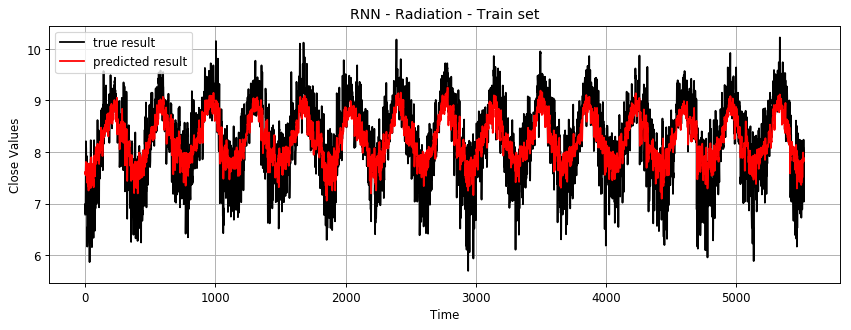

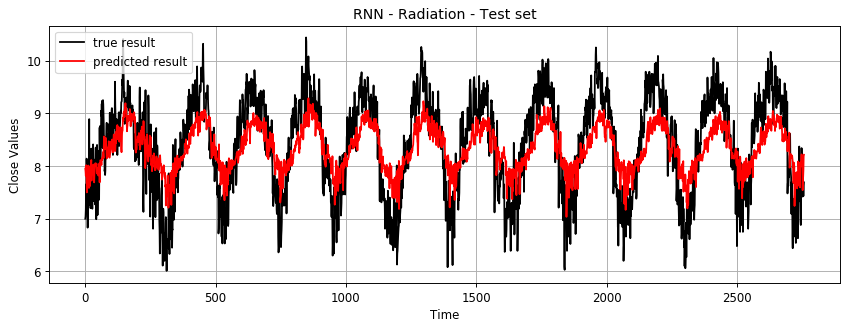

In [147]:
predicted_datarnnDB=modelrnnDB.predict(X_train)
plt.figure(figsize=(12,4), dpi=85, facecolor='w', edgecolor='k')
plt.plot(y_train,color="k",label="true result")
plt.plot(predicted_datarnnDB,color="r",label="predicted result")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Close Values")
plt.grid(True)
plt.title("RNN - Radiation - Train set")
plt.show()
predicted_datarnnDB2=modelrnnDB.predict(X_test)
plt.figure(figsize=(12,4), dpi=85, facecolor='w', edgecolor='k')
plt.plot(y_test,color="k",label="true result")
plt.plot(predicted_datarnnDB2,color="r",label="predicted result")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Close Values")
plt.title("RNN - Radiation - Test set")
plt.grid(True)
plt.show()